<a href="https://colab.research.google.com/github/encoras/Artificial-Intelligence-Group/blob/master/Feature_transform_Task_classifier_adult.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from  sklearn import datasets
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from matplotlib import pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score
from sklearn.metrics import recall_score, f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, precision_recall_curve, classification_report
from sklearn import svm
from numpy.random import seed


# **RAND=22310 # should be your student code abcd**

In [ ]:
RAND=1234 # should be your student code abcd
seed(RAND)

from https://drive.google.com/file/d/1-jrwZmZ3kqH-3JbckqbxEsr7EjW27IDJ/view?usp=sharing copy file archive.zip to your folder.

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/pooja2512/Adult-Census-Income/refs/heads/master/adult.csv')

**About the Dataset**
```*Age: Describes the age of individuals. Continuous.
*Workclass*: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
*fnlwgt*: Continuous.
*education*: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
*education-num*: Number of years spent in education. Continuous.
*marital-status*: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
*occupation*: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
*relationship*: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
*race*: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
*sex*: Female, Male.
*capital-gain*: Continuous.
*capital-loss*: Continuous.
*hours-per-week*: Continuous.
*native-country*: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
*salary*: >50K,<=50K  ---- CLASSIFICATION Target

```



In [ ]:
exclude_atribute=[ "fnlwgt", 'education.num', 'capital.gain', 'capital.loss']
for att in exclude_atribute:
  del df[att]
df.head()

,age,workclass,education,marital.status,occupation,relationship,race,sex,hours.per.week,native.country,income
0,90,?,HS-grad,Widowed,?,Not-in-family,White,Female,40,United-States,<=50K
1,82,Private,HS-grad,Widowed,Exec-managerial,Not-in-family,White,Female,18,United-States,<=50K
2,66,?,Some-college,Widowed,?,Unmarried,Black,Female,40,United-States,<=50K
3,54,Private,7th-8th,Divorced,Machine-op-inspct,Unmarried,White,Female,40,United-States,<=50K
4,41,Private,Some-college,Separated,Prof-specialty,Own-child,White,Female,40,United-States,<=50K


We can see that the columns workclass, occupation, and native.country contains null values. There can be many ways to impute missing values, but right now, for the sake of simplicity we would impute them using mode!



In [ ]:
df[df == '?'] = np.nan
for col in ['workclass', 'occupation', 'native.country']:
    df[col].fillna(df[col].mode()[0], inplace=True)

<ipython-input-5-36955cd4f62e>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


Data preparation for a model implementation

In [ ]:
from sklearn.preprocessing import LabelEncoder
categorical = ['workclass','education', 'marital.status', 'occupation', 'relationship',
               'race', 'sex','native.country','income']
label_encoder = LabelEncoder()
for col in categorical:
    label_encoder.fit(df[col])
    df[col] = label_encoder.transform(df[col])

from sklearn.model_selection import train_test_split
X = df[['workclass','education', 'marital.status', 'occupation', 'relationship',
               'race', 'sex','native.country', 'age', 'hours.per.week']]
y = df['income']

feature_name = ['workclass','education', 'marital.status', 'occupation', 'relationship',
               'race', 'sex','native.country', 'age', 'hours.per.week']

#let's split data and do input feature transform.

In [ ]:
X_tr, X_te, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=RAND, shuffle=True, stratify=y)

In [ ]:
from sklearn.preprocessing import StandardScaler
#Train standardsaler on X_tr and apply it to X_tr and X_te
--code--
X_train=--code--
X_test=--code--

## Let's implement the baseline model. With THE BEST parameters from the assignment 2 and all features from a dataset.

**The task 1.**
Depending on the last digit of your student Internal code (abcde) take an "optimal" specific *parameter* from the assignment 2.
The RAND variable is your student ID numbers RAND="bcde" at a top of the code.

0. DecisionTreeClassifier(criterion='entropy', random_state=RAND, min_samples_split = `???`)
1. DecisionTreeClassifier(criterion='gini', random_state=RAND, max_depth = `???`)
2. KNeighborsClassifier(n_neighbors=`???`, p=2)
3. KNeighborsClassifier(n_neighbors='???', p=1)
4. svm. SVC(random_state=RAND, kernel='linear', C=`???`)
5. svm.SVC(random_state=RAND, kernel='rbf', gamma=0.07, C=`???`)
6. svm.SVC(random_state=RAND,kernel='poly', degree=3, C=`???`)
7. svm.LinearSVC(random_state=RAND,C=`???`)
8. MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(`???`,), random_state=RAND)
9. MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(`???`,5), random_state=RAND)

In [ ]:
model = -- to code the BEST classifier from 2-nd task--
--code--
scores_baseline=--code--
print("Baseline accuracy = ", scores_baseline)


Baseline accuracy =  0.8245470365441704


In [ ]:
# Plot Confusion matrix
# -- to code --


In [ ]:
print("Baseline metrics:")
print("- Accuracy  = %.3f" % accuracy_score(y_test, y_pred))
print("- ROC AUC   = %.3f" % roc_auc_score(y_test, y_pred))
# compute the classification report
print(classification_report(y_test, y_pred))

-----------------------------------------------------------------------
**Now, let's build your model with feature selection.**
-----------------------------------------------------------------------

#Task 2. Features transformation by t-SNE for visualisation purpose

2.1 Apply T-SNE to trasform the data into 2D space, use "random_state=RAND". See example: https://scipy-lectures.org/packages/scikit-learn/auto_examples/plot_tsne.html





In [ ]:
from sklearn.manifold import TSNE
sklearn_tsne = TSNE(--code--)

X_test_tsne=sklearn_tsne.fit_transform(X_test[:5000,:])
import seaborn as sns
sns.scatterplot(x=X_test_tsne[:5000,0], y=X_test_tsne[:5000,1], hue=y_test[:5000],
                palette=sns.color_palette("hls", 2)).set(title="Adult data t-SNE projection")

#Task 3. Features transformation by linear PCA.

3.1 Apply Linear PCA to trasform the data into 2D space, use "random_state=RAND". See example: https://www.geeksforgeeks.org/implementing-pca-in-python-with-scikit-learn/

3.2 Applay PCA transformation to train and test sets. Train the classifier and enaluate the accuracy


In [ ]:
from sklearn.decomposition import PCA as sklearnPCA
sklearn_pca = sklearnPCA(n_components=2, random_state= --code--)
--to code--
X_train_pca = --to code --
X_test_pca  = sklearn_pca.transform(X_test)
sns.scatterplot(x=X_test_pca[:,0], y=X_test_pca[:,1], hue=y_test, palette=sns.color_palette("hls", 2)).set(title="Adult data PCA projection")


In [ ]:
sklearn_pca.components_

In [ ]:
model.fit(X_train_pca, y_train)
y_pred = model.predict(X_test_pca)
scores_pca= -- to code --
print("linear-PCA features accuracy = ", scores_pca)


3.3 Apply Linear PCA to trasform the data into 3D space

In [ ]:
sklearn_pca = sklearnPCA(n_components=--code--, random_state= --code--)
sklearn_pca.fit(--code--)
X_train_pca = sklearn_pca.transform(X_train)
X_test_pca  = sklearn_pca.transform(X_test)
# import relevant libraries for 3d graph
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10,10))

# choose projection 3d for creating a 3d graph
axis = fig.add_subplot(111, projection='3d')

# x[:,0]is pc1,x[:,1] is pc2 while x[:,2] is pc3
axis.scatter(X_test_pca[:,0],X_test_pca[:,1],X_test_pca[:,2], c=y_test,cmap='plasma')
axis.set_xlabel("PC1", fontsize=10)
axis.set_ylabel("PC2", fontsize=10)
axis.set_zlabel("PC3", fontsize=10)



3.4 Evaluate model's prediction in 3D data space

In [ ]:
# take your model, train and evaluate on 3 features and plot confusion matrix
--code--
--code--
--code--


#Task 3. features trasformation by KernelPCA.

Student ID [abcde]

If e=[0,1] use kernel='linear'

If e=[2,3] use kernel='poly'

If e=[4,5] use kernel='rbf'

If e=[6,7] use kernel='sigmoid'

If e=[8,9] use kernel='cosine'

3.1 Select best number of features from n_components=1 to 9 with the best test set classification accuracy.
3.2 Plot accuracy graph Accuracy vs number of Principal Componentes (n_components).
see examplel: https://www.bogotobogo.com/python/scikit-learn/scikit_machine_learning_Data_Compresssion_via_Dimensionality_Reduction_3-nonlinear-mappings-via-kernel-principal-component-analysis.php

P.s. due to big number of data, the calculations may take up to 20min.

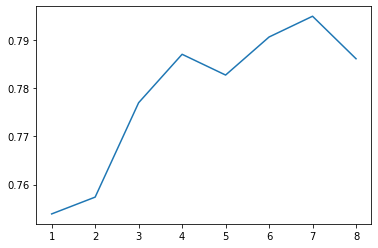

In [ ]:
from sklearn.decomposition import KernelPCA
scores=[]
for i in range(1,9):
  sklearn_pca = KernelPCA (--to code --)
  --to code--
  scores.append(scores_base)

plt.plot(range(1,9), scores)

#Task 4. Print classifications results: with all features; by 2 linear-PCA and with best reduced by Kernel PCA



In [ ]:

-- to code --

##As a conclusion - review the results and compare them with feature selection methods in assignment 3. I.e. How many features is enough? Which one is easier to interpret? Which one gives the best accuracy.

In [ ]:
#https://scikit-learn.org/stable/auto_examples/compose/plot_digits_pipe.html
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
# Define a pipeline to search for the best combination of PCA truncation
# and classifier regularization.
pca = PCA()
# Define a Standard Scaler to normalize inputs
scaler = StandardScaler()
# Define model
model = DecisionTreeClassifier()
# set the tolerance to a large value to make the example faster

pipe = Pipeline(steps=[("scaler", scaler), ("pca", pca), ("model", model)])
param_grid = {
    "pca__n_components": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    "model__criterion": ['entropy'],
    "model__min_samples_split": [250, 300, 350],
    "model__max_depth": [15, 20, 25]
}
search = GridSearchCV(pipe, param_grid, verbose=1, n_jobs=-1)
search.fit(X_train, y_train)
print("Best parameter (CV score=%0.3f):" % search.best_score_)

print(search.best_params_)

Fitting 5 folds for each of 90 candidates, totalling 450 fits
Best parameter (CV score=0.799):
{'model__criterion': 'entropy', 'model__max_depth': 20, 'model__min_samples_split': 300, 'pca__n_components': 10}


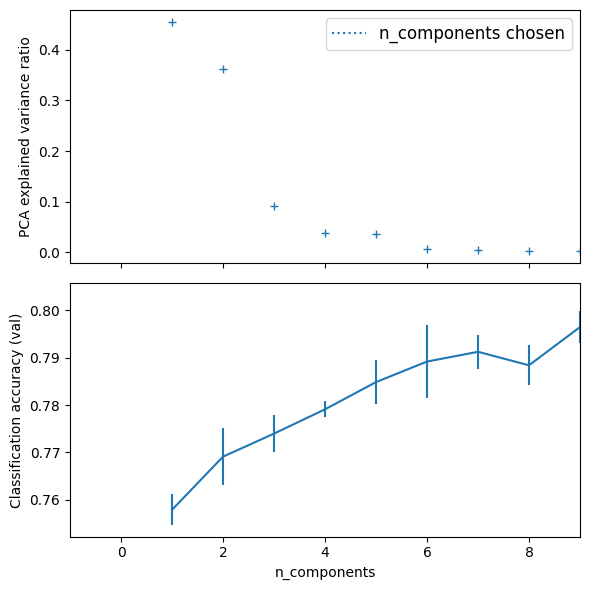

In [ ]:
import polars as pl
# Plot the PCA spectrum
pca.fit(X_tr)

fig, (ax0, ax1) = plt.subplots(nrows=2, sharex=True, figsize=(6, 6))
ax0.plot(
    np.arange(1, pca.n_components_ + 1), pca.explained_variance_ratio_, "+", linewidth=2
)
ax0.set_ylabel("PCA explained variance ratio")

ax0.axvline(
    search.best_estimator_.named_steps["pca"].n_components,
    linestyle=":",
    label="n_components chosen",
)
ax0.legend(prop=dict(size=12))
# For each number of components, find the best classifier results
components_col = "param_pca__n_components"
is_max_test_score = pl.col("mean_test_score") == pl.col("mean_test_score").max()
best_clfs = (
    pl.LazyFrame(search.cv_results_)
    .filter(is_max_test_score.over(components_col))
    .unique(components_col)
    .sort(components_col)
    .collect()
)
ax1.errorbar(
    best_clfs[components_col],
    best_clfs["mean_test_score"],
    yerr=best_clfs["std_test_score"],
)
ax1.set_ylabel("Classification accuracy (val)")
ax1.set_xlabel("n_components")

plt.xlim(-1, 9)

plt.tight_layout()
plt.show()

In [ ]:
clf = search.best_estimator_
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
scores_base=clf.score(X_test, y_test)
print("Classificator with PCA accuracy = ", scores_base)
#

Classif with PCA accuracy =  0.7988535162247927


In [ ]:
report = classification_report(y_test, y_pred)
print("Classificaion Report")
print(report)

Classificaion Report
              precision    recall  f1-score   support

           0       0.84      0.91      0.87      7417
           1       0.61      0.45      0.52      2352

    accuracy                           0.80      9769
   macro avg       0.73      0.68      0.70      9769
weighted avg       0.78      0.80      0.79      9769



[[0.83947696 0.38872915]
 [0.16052304 0.61127085]]


Text(0.5, 23.52222222222222, 'Predicted')

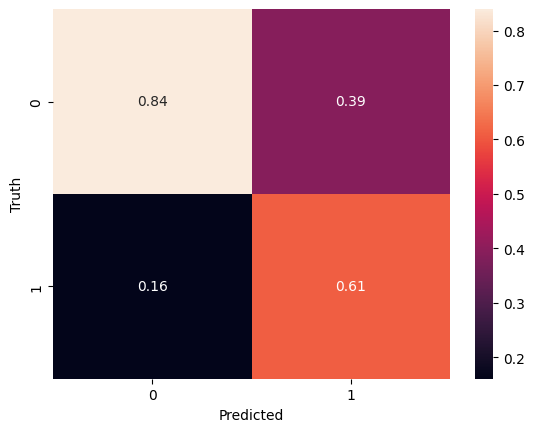

In [ ]:
# confusion matrix
cm = confusion_matrix(y_test,y_pred, normalize='pred')
print(cm)

# using seaborn
sns.heatmap(cm,annot=True)
plt.ylabel("Truth")
plt.xlabel("Predicted")